In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
%load_ext autoreload
%autoreload 2
from fastai import *
from fastai.text import * 
from fastai.callbacks import *
import pandas as pd
from tqdm import tnrange, tqdm_notebook

In [3]:
# See how many devices are around
print('Devices available: ', torch.cuda.device_count())
# Set it to a particular device
CUDA_DEVICE = 4
print('Set device: ', CUDA_DEVICE)
torch.cuda.set_device(CUDA_DEVICE)
# Check which device you are on
print('Current device: ', torch.cuda.current_device())

Devices available:  8
Set device:  4
Current device:  4


In [4]:
DATA_PATH = '../../data/mercado-livre-pt-only'
TRAIN_DATASET = os.path.join(DATA_PATH, 'train.csv')
VAL_DATASET = os.path.join(DATA_PATH, 'val.csv')
TEST_DATASET  = os.path.join(DATA_PATH, 'test.csv')

In [5]:
LM_PATH=Path('../../models/ulmfit/lm/mercado-livre-pt-only')
LM_PATH.mkdir(exist_ok=True)

In [6]:
def read_data(filename):
    data = pd.read_csv(filename, sep=",", names =['utterance','label'], header=None, dtype={'utterance':str, 'label': str} )
    return data

In [7]:
train_dataset = read_data(TRAIN_DATASET).dropna()
val_dataset = read_data(VAL_DATASET).dropna()
test_dataset = read_data(TEST_DATASET).dropna()

In [8]:
test_dataset.head()

,utterance,label
0,pulseira original diesel dz4128 eua,WATCH_BANDS
1,armacao troca hastes aviador smart (preto prat...,GLASSES_FRAMES
2,mini tv digital portatil 4.3 video fm microsd...,TELEVISIONS
3,carrinho peg perego super confortavel e em bom...,BABY_STROLLERS
4,squeeze de aluminio 500ml personalizado kit 9,SPORT_AND_BAZAAR_BOTTLES


In [9]:
tokenizer = Tokenizer(lang='pt', n_cpus=10)

In [10]:
data_lm = TextLMDataBunch.from_df(LM_PATH, train_df = train_dataset, valid_df = val_dataset,  bs=128, text_cols=0)

In [11]:
data_lm.save('data_lm_mercado_livre_pt_only')

In [12]:
data_lm = load_data(LM_PATH, 'data_lm_mercado_livre_pt_only', bs=64)

In [13]:
weights_pretrained = 'wiki_pt_lm_30k_step4'
itos_pretrained = 'wiki_pt_lm_30k_itos_vocab'
pretained_data = (weights_pretrained, itos_pretrained)

In [14]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=pretained_data, pretrained=False, drop_mult=0, callback_fns=ShowGraph)
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02


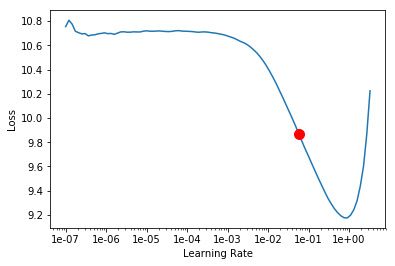

In [15]:
learn.lr_find()
learn.recorder.plot(suggestion=True, skip_start=0)

epoch,train_loss,valid_loss,accuracy,time
0,4.848945,4.767417,0.261636,04:04
1,4.739356,4.665157,0.270343,04:05
2,4.388171,4.406435,0.290522,04:04
3,3.966200,4.161004,0.314433,04:04
4,3.581541,4.106913,0.322654,04:04


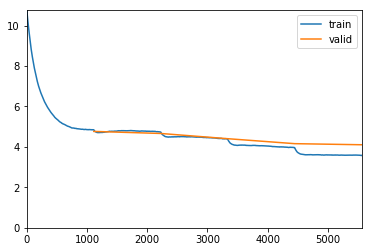

Better model found at epoch 0 with val_loss value: 4.767416954040527.
Better model found at epoch 1 with val_loss value: 4.665156841278076.
Better model found at epoch 2 with val_loss value: 4.406435012817383.
Better model found at epoch 3 with val_loss value: 4.161004066467285.
Better model found at epoch 4 with val_loss value: 4.106912612915039.


In [16]:
learn.fit_one_cycle(5, 3e-2, moms=(0.8,0.7),callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='wikipt-30k-FT-mercado-livre-pt-only-head-best')])

In [17]:
learn.load('wikipt-30k-FT-mercado-livre-pt-only-head-best') 

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (498779 items)
x: LMTextList
xxbos frigideira profissional fit chef restaurante no 24 multiflon,xxbos kit 2 camera ip 3 antenas hd 720 sem fio wifi antena,xxbos contadora de dinheiro 1000 notas / min ganhe caneta detectora,xxbos redermic r olhos la roche - posay 15ml anti - rugas val.10 / 2018,xxbos cuisinart preparacao plus 11-cup processador de alimentos
y: LMLabelList
,,,,
Path: ../../models/ulmfit/lm/mercado-livre-pt-only;

Valid: LabelList (55420 items)
x: LMTextList
xxbos sunga xxunk 2019,xxbos cozinha com ilha moveis 100 % mdf ( 800 00 m2 ) .,xxbos calcanheira calc fine em gel masculina - fort spuma,xxbos grappa miolo 500ml,xxbos engate mobi todos
y: LMLabelList
,,,,
Path: ../../models/ulmfit/lm/mercado-livre-pt-only;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60006, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60006, 400, padding_idx=1)
    )
    (rnns): Mo

epoch,train_loss,valid_loss,accuracy,time
0,3.898591,4.170499,0.305811,04:32
1,3.955468,4.029091,0.319639,04:31
2,3.650457,3.834853,0.342427,04:32
3,3.216240,3.691013,0.364394,04:32
4,2.766049,3.735335,0.368716,04:32


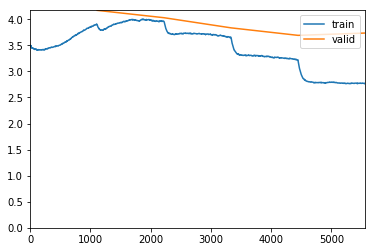

Better model found at epoch 0 with val_loss value: 4.170498847961426.
Better model found at epoch 1 with val_loss value: 4.029090881347656.
Better model found at epoch 2 with val_loss value: 3.834852695465088.
Better model found at epoch 3 with val_loss value: 3.6910128593444824.


In [18]:
learn.unfreeze()
learn.fit_one_cycle(5, 8E-3, moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='wikipt-30k-FT-mercado-livre-pt-only-step2-best')])

In [19]:
np.exp(3.735335)

41.90206040237069

In [20]:
learn.load('wikipt-30k-FT-mercado-livre-pt-only-step2-best')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (498779 items)
x: LMTextList
xxbos frigideira profissional fit chef restaurante no 24 multiflon,xxbos kit 2 camera ip 3 antenas hd 720 sem fio wifi antena,xxbos contadora de dinheiro 1000 notas / min ganhe caneta detectora,xxbos redermic r olhos la roche - posay 15ml anti - rugas val.10 / 2018,xxbos cuisinart preparacao plus 11-cup processador de alimentos
y: LMLabelList
,,,,
Path: ../../models/ulmfit/lm/mercado-livre-pt-only;

Valid: LabelList (55420 items)
x: LMTextList
xxbos sunga xxunk 2019,xxbos cozinha com ilha moveis 100 % mdf ( 800 00 m2 ) .,xxbos calcanheira calc fine em gel masculina - fort spuma,xxbos grappa miolo 500ml,xxbos engate mobi todos
y: LMLabelList
,,,,
Path: ../../models/ulmfit/lm/mercado-livre-pt-only;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60006, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60006, 400, padding_idx=1)
    )
    (rnns): Mo

In [21]:
learn.save_encoder('wikipt-30k-FT-mercado-livre-pt-only-encoder')

In [22]:
!cp ../../models/ulmfit/lm/mercado-livre-pt-only/models/wikipt-30k-FT-mercado-livre-pt-only-encoder.pth models/

In [23]:
data_class = TextClasDataBunch.from_df(path = "", train_df = train_dataset, valid_df = val_dataset, test_df = test_dataset,  vocab=data_lm.train_ds.vocab,tokenizer=tokenizer, bs=128, text_cols=['utterance'], label_cols=['label'])

In [24]:
learn = text_classifier_learner(data_class, AWD_LSTM, drop_mult=0.1, callback_fns=ShowGraph)
learn.load_encoder('wikipt-30k-FT-mercado-livre-pt-only-encoder')
learn.freeze()

/opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02


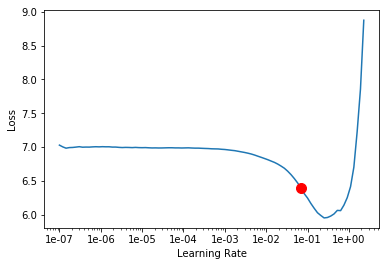

In [25]:
learn.lr_find()
learn.recorder.plot(suggestion=True, skip_start=0)

epoch,train_loss,valid_loss,accuracy,time
0,0.678973,0.601027,0.867485,01:22
1,0.811163,0.690772,0.850126,01:23
2,0.924448,0.731483,0.841086,01:21
3,0.826459,0.785952,0.830314,01:22
4,0.820091,0.689994,0.847600,01:23
5,0.750139,0.631875,0.861079,01:23
6,0.678912,0.537358,0.877770,01:22
7,0.556836,0.451318,0.895922,01:23
8,0.428471,0.385493,0.910123,01:22
9,0.394022,0.360946,0.916745,01:23


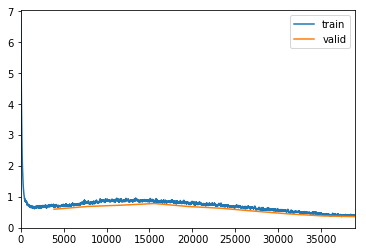

Better model found at epoch 0 with val_loss value: 0.6010267734527588.
Better model found at epoch 6 with val_loss value: 0.5373581051826477.
Better model found at epoch 7 with val_loss value: 0.4513178765773773.
Better model found at epoch 8 with val_loss value: 0.385492742061615.
Better model found at epoch 9 with val_loss value: 0.3609464466571808.


In [26]:
learn.fit_one_cycle(10, 8E-2, moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='wikipt-30k-FT-mercado-livre-pt-only-classifier-head-best')])

In [27]:
learn.load('wikipt-30k-FT-mercado-livre-pt-only-classifier-head-best')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (498779 items)
x: TextList
xxbos frigideira profissional fit chef restaurante no 24 multiflon,xxbos kit 2 camera ip 3 antenas hd 720 sem fio wifi antena,xxbos contadora de dinheiro 1000 notas / min ganhe caneta detectora,xxbos redermic r olhos la xxunk 15ml xxunk val.10 / 2018,xxbos cuisinart preparacao plus 11-cup processador de alimentos
y: CategoryList
KITCHEN_POTS,SURVEILLANCE_CAMERAS,BILL_COUNTERS,FACIAL_SKIN_CARE_PRODUCTS,FOOD_PROCESSORS
Path: .;

Valid: LabelList (55420 items)
x: TextList
xxbos sunga xxunk 2019,xxbos cozinha com ilha moveis 100 % mdf ( 800 00 m2 ) .,xxbos calcanheira calc fine em gel masculina - fort spuma,xxbos grappa miolo 500ml,xxbos engate mobi todos
y: CategoryList
MEN_SWIMWEAR,KITCHEN_FURNITURE,HEEL_CUPS,WINES,TRAILER_HITCHES
Path: .;

Test: LabelList (138551 items)
x: TextList
xxbos pulseira original diesel xxunk eua,xxbos armacao troca hastes aviador smart ( preto prata dourado ),xxbos mini tv digital 

epoch,train_loss,valid_loss,accuracy,time
0,0.761796,0.652616,0.867070,01:33
1,0.348327,0.328488,0.927914,01:34


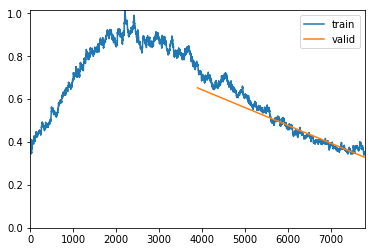

Better model found at epoch 0 with val_loss value: 0.6526163816452026.
Better model found at epoch 1 with val_loss value: 0.3284883499145508.


In [28]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(8E-2/(2.6**4),8E-2), moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='wikipt-30k-FT-mercado-livre-pt-only-classifier-step2')])


In [29]:
learn.load('wikipt-30k-FT-mercado-livre-pt-only-classifier-step2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (498779 items)
x: TextList
xxbos frigideira profissional fit chef restaurante no 24 multiflon,xxbos kit 2 camera ip 3 antenas hd 720 sem fio wifi antena,xxbos contadora de dinheiro 1000 notas / min ganhe caneta detectora,xxbos redermic r olhos la xxunk 15ml xxunk val.10 / 2018,xxbos cuisinart preparacao plus 11-cup processador de alimentos
y: CategoryList
KITCHEN_POTS,SURVEILLANCE_CAMERAS,BILL_COUNTERS,FACIAL_SKIN_CARE_PRODUCTS,FOOD_PROCESSORS
Path: .;

Valid: LabelList (55420 items)
x: TextList
xxbos sunga xxunk 2019,xxbos cozinha com ilha moveis 100 % mdf ( 800 00 m2 ) .,xxbos calcanheira calc fine em gel masculina - fort spuma,xxbos grappa miolo 500ml,xxbos engate mobi todos
y: CategoryList
MEN_SWIMWEAR,KITCHEN_FURNITURE,HEEL_CUPS,WINES,TRAILER_HITCHES
Path: .;

Test: LabelList (138551 items)
x: TextList
xxbos pulseira original diesel xxunk eua,xxbos armacao troca hastes aviador smart ( preto prata dourado ),xxbos mini tv digital 

epoch,train_loss,valid_loss,accuracy,time
0,0.656156,0.607459,0.873854,02:15
1,0.541746,0.493379,0.900469,02:18
2,0.343677,0.328127,0.929863,02:17
3,0.217155,0.260770,0.943594,02:15


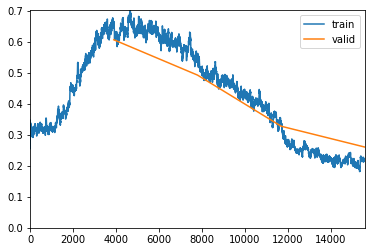

Better model found at epoch 0 with val_loss value: 0.607459306716919.
Better model found at epoch 1 with val_loss value: 0.4933786392211914.
Better model found at epoch 2 with val_loss value: 0.32812705636024475.
Better model found at epoch 3 with val_loss value: 0.260770320892334.


In [30]:
learn.freeze_to(-3)
learn.fit_one_cycle(4, slice(5e-2/(2.6**4),5e-2), moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='wikipt-30k-FT-mercado-livre-pt-only-classifier-step3')])


In [31]:
learn.load('wikipt-30k-FT-mercado-livre-pt-only-classifier-step3')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (498779 items)
x: TextList
xxbos frigideira profissional fit chef restaurante no 24 multiflon,xxbos kit 2 camera ip 3 antenas hd 720 sem fio wifi antena,xxbos contadora de dinheiro 1000 notas / min ganhe caneta detectora,xxbos redermic r olhos la xxunk 15ml xxunk val.10 / 2018,xxbos cuisinart preparacao plus 11-cup processador de alimentos
y: CategoryList
KITCHEN_POTS,SURVEILLANCE_CAMERAS,BILL_COUNTERS,FACIAL_SKIN_CARE_PRODUCTS,FOOD_PROCESSORS
Path: .;

Valid: LabelList (55420 items)
x: TextList
xxbos sunga xxunk 2019,xxbos cozinha com ilha moveis 100 % mdf ( 800 00 m2 ) .,xxbos calcanheira calc fine em gel masculina - fort spuma,xxbos grappa miolo 500ml,xxbos engate mobi todos
y: CategoryList
MEN_SWIMWEAR,KITCHEN_FURNITURE,HEEL_CUPS,WINES,TRAILER_HITCHES
Path: .;

Test: LabelList (138551 items)
x: TextList
xxbos pulseira original diesel xxunk eua,xxbos armacao troca hastes aviador smart ( preto prata dourado ),xxbos mini tv digital 

epoch,train_loss,valid_loss,accuracy,time
0,0.157531,0.261646,0.944298,03:08
1,0.146755,0.258676,0.945092,03:12
2,0.135065,0.258110,0.946121,03:13
3,0.139934,0.260024,0.946139,03:12


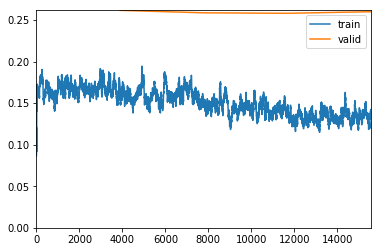

Better model found at epoch 0 with val_loss value: 0.26164567470550537.
Better model found at epoch 1 with val_loss value: 0.2586759924888611.
Better model found at epoch 2 with val_loss value: 0.2581104636192322.


In [32]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='wikipt-30k-FT-mercado-livre-pt-only-classifier-step4')])

In [33]:
learn.load('wikipt-30k-FT-mercado-livre-pt-only-classifier-step4')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (498779 items)
x: TextList
xxbos frigideira profissional fit chef restaurante no 24 multiflon,xxbos kit 2 camera ip 3 antenas hd 720 sem fio wifi antena,xxbos contadora de dinheiro 1000 notas / min ganhe caneta detectora,xxbos redermic r olhos la xxunk 15ml xxunk val.10 / 2018,xxbos cuisinart preparacao plus 11-cup processador de alimentos
y: CategoryList
KITCHEN_POTS,SURVEILLANCE_CAMERAS,BILL_COUNTERS,FACIAL_SKIN_CARE_PRODUCTS,FOOD_PROCESSORS
Path: .;

Valid: LabelList (55420 items)
x: TextList
xxbos sunga xxunk 2019,xxbos cozinha com ilha moveis 100 % mdf ( 800 00 m2 ) .,xxbos calcanheira calc fine em gel masculina - fort spuma,xxbos grappa miolo 500ml,xxbos engate mobi todos
y: CategoryList
MEN_SWIMWEAR,KITCHEN_FURNITURE,HEEL_CUPS,WINES,TRAILER_HITCHES
Path: .;

Test: LabelList (138551 items)
x: TextList
xxbos pulseira original diesel xxunk eua,xxbos armacao troca hastes aviador smart ( preto prata dourado ),xxbos mini tv digital 

In [ ]:
learn.data.classes

In [35]:
y = []
for item in test_dataset.itertuples():
    label = item[2]
    try:
        label_id = learn.data.classes.index(label)
    except:
        print(label)
    y.append(label_id)

In [36]:
preds_test = learn.get_preds(ds_type = DatasetType.Test, ordered=True)

In [37]:
y_hat = torch.argmax(preds_test[0], dim=1)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y, y_hat, target_names=learn.data.classes, digits=3))

                                             precision    recall  f1-score   support

                                3D_PRINTERS      0.975     0.830     0.897        47
                                ABS_SENSORS      0.985     0.936     0.960       140
                           AB_ROLLER_WHEELS      1.000     0.900     0.947        10
                                 ACCORDIONS      0.987     0.984     0.986       311
                            ACOUSTIC_PANELS      0.818     1.000     0.900         9
                             ACTION_FIGURES      0.759     0.755     0.757       800
                             ADHESIVE_TAPES      0.925     0.968     0.946       253
                                AFTERSHAVES      0.000     0.000     0.000         3
                                    AIRBAGS      1.000     1.000     1.000        42
                             AIRBAG_MODULES      1.000     1.000     1.000         3
                                 AIRBRUSHES      0.800     1.000

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
classes = {}

for index, row in test_dataset.iterrows():
    try:
        symptom_label = row['label']
        utterance = row['utterance']
        utt_arr = utterance.split()
        utt_count = len(utt_arr)
        if symptom_label not in classes:
            classes[symptom_label] = {'tokens': utt_count, 'utterances': 1, 'avg': utt_count }
        else:
            classes[symptom_label]['tokens'] += utt_count
            classes[symptom_label]['utterances'] += 1
            classes[symptom_label]['avg'] = classes[symptom_label]['tokens']/classes[symptom_label]['utterances']

    except:
        print(json_line)

for c in classes:
    print(c + ';' + str(classes[c]['avg']))

WATCH_BANDS;5.6716981132075475
GLASSES_FRAMES;8.679054054054054
TELEVISIONS;8.315934065934066
BABY_STROLLERS;7.861111111111111
SPORT_AND_BAZAAR_BOTTLES;8.183406113537117
MOBILE_DEVICE_CHARGERS;9.08457711442786
DISC_PACKAGINGS;8.31081081081081
PANTS;8.444305381727158
OUTER_TIE_ROD_ENDS;7.689516129032258
RINGS;8.511627906976743
SEX_TOY_KITS;9.46875
NOTEBOOKS;9.788213627992633
SURVEILLANCE_CAMERAS;8.898789878987898
RESISTANCE_BANDS;8.377777777777778
FREEZERS;5.990990990990991
SUNGLASSES;8.458285714285715
WHISKEYS;8.168539325842696
MATTRESSES;7.955056179775281
CARPETS;9.228704784130688
SMARTWATCHES;8.179558011049723
FISHING_REELS;8.145945945945947
MICROPHONES;8.6
BLU_RAY_PLAYERS;6.691428571428571
DESKTOP_COMPUTER_COOLERS_AND_FANS;9.060869565217391
LIP_GLOSSES;7.726315789473684
HANDBAGS;7.7
FABRICS;8.725593667546175
DENTAL_PLIERS;6.470588235294118
DOLLS;8.16488730723606
SOFA_AND_FUTON_COVERS;10.575757575757576
FLASHLIGHTS;8.391089108910892
CELLPHONE_COVERS;10.87037037037037
FOOTBALL_SHIRTS;